In [4]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad, dblquad
from scipy.special import roots_legendre
from typing import Callable

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Edwar Isaías Pacheco Rojas
### CC: 1017240283
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales, garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$:

---
a) $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
b) $$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

c) $$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---


La integral $\int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}$ presenta una discontinuidad en $x=0$, con lo que debemos considerar una sustitución adecuada. Consideremos la sustitución $u=\sqrt{tan(x)}$.

$$
u= \sqrt{tan(x)} \Rightarrow {du}=\frac{sec^{2}{x}}{2\cdot \sqrt{tan{x}}}{dx}
$$

$$
\Leftrightarrow \frac{2du}{1 + tan^{2}{x}}=\frac{dx}{\sqrt{tan{x}}}
$$

$$
\therefore \frac{2}{1 + u^{4}}=\frac{dx}{\sqrt{tan{x}}}
$$
Si $x=0$, entonces $u=0$; si $x=\frac{\pi}{2}$, $u\to \infty$. Así, la integral se transforma en:

$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx} = \int_{0}^{\infty}\frac{2}{1 + u^{4}}{du} = \int_{0}^{1}\frac{2du}{1 + u^{4}}  +  \int_{1}^{\infty}\frac{2du}{1 + u^{4}}
 $$

 Para la segunda integral de la derecha, consideramos el cambio de variable $u=1/t$, como se vio en clase. Así, nos queda:

 $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx} = \int_{0}^{\infty}\frac{2}{1 + u^{4}}{du} = \int_{0}^{1}\frac{2du}{1 + u^{4}}  +  \int_{0}^{1}\frac{2}{t^{2}}\frac{dt}{1 + (\frac{1}{t})^{4}}
 $$

In [5]:
# @title Funciones de integración numérica

def integral_riemman(f: Callable[[float], float], a:float, b:float
                     , n: int) -> float:

  """
  Aproximación de la intral de f.

  Args:
    :f: Función a integrar
    :a: Índice inferior de la integral
    :b: Índice superior de la integral
    :n: Número de subintervalos

  Returns:
    float
  """

  h = (b - a) / n
  integral = 0
  for i in range(n):
    x_i = a + i * h
    integral += f(x_i + h / 2)

  return integral * h


def integral_simpson13(f: Callable[[float], float], a:float, b:float
                     , n: int) -> float:

  """
  Aproximación de la integral definida de f entre [a, b].

  Args:
    :f: Función a integrar
    :a: Límite inferior del intervalo
    :b: Límite superior del intervalo
    :n: Factor de división del intervalo

  Returns:
    :float: valor de aproximación de la integral
  """

  if n % 2 != 0:
    raise ValueError("El número de intervalos debe ser par.")

  h = (b - a) / n
  integral = f(a) + f(b)
  # Términos impares
  for i in range(1, n, 2):
    x_i = a + i * h
    integral += 4 * f(x_i)
  # Términos pares
  for j in range(2, n, 2):
    x_i = a + j * h
    integral += 2 * f(x_i)

  return integral * (h / 3)


def integral_simpson38(f: Callable[[float], float], a:float, b:float
                     , n: int) -> float:

  """
  Aproximación de la integral de f en [a, b] por el método de Simpson 3/8.

  Args:
    :f: Función a integrar
    :a: Límite inferior del intervalo
    :b: Límite superior del intervalo
    :n: Número de subintervalos

  Returns:
    :float: valor de aproximación de la integral
  """

  # Verificar que el número de intervalos es múltiplo de 3
  if n % 3 != 0:
      raise ValueError("El número de subintervalos 'n' debe ser múltiplo de 3 \
      para el método de Simpson 3/8.")

  h = (b - a) / n
  integral = f(a) + f(b)
  integral_no_3 = 0
  integral_3 = 0
  for k in range(1, n):
    x_k = a + k * h
    if k % 3 == 0:
      integral_3 += 2 * f(x_k)
    else:
      integral_no_3 += 3 * f(x_k)

  return (integral + integral_no_3 + integral_3) * (3 * h / 8)


def integral_trapecio(f: Callable[[float], float], a:float, b:float
                     , n: int) -> float:

  """
    Aproximación de la integral de f en [a, b] por el método trapezoidal.

  Args:
    :f: Función a integrar
    :a: Límite inferior del intervalo
    :b: Límite superior del intervalo
    :n: Número de subintervalos

  Returns:
    :float: valor de aproximación de la integral
  """

  h = (b - a) / n
  integral = f(a) + f(b)
  for i in range(1, n):
    x_i = a + i * h
    integral += 2 * f(x_i)

  return (h / 2) * integral



## Solución a)

In [6]:
# @title Valor "exacto" de la integral a)
x = sp.symbols('x')
f = 1 / sp.sqrt(sp.tan(x))

# Transformación de la integral
g =  lambda u: 2 / (1 + u**4)
g_ = lambda t: (2*t**2) / (1 + t**4)

# Error de estimación
eps = 1e-5

integral_a = sp.integrate(f, (x, 0, sp.pi / 2)).evalf()
print(f'Valor "exacto" de la integral: {integral_a}')

Valor "exacto" de la integral: 2.22144146907918


In [7]:

# @title Cuadratura de Riemman

n = 1  # División inicial de los intervalos
while True:
  integral_g = integral_riemman(g, 0, 1, n)
  integral_g_ = integral_riemman(g_, 0, 1, n)
  error = abs(integral_g + integral_g_ - integral_a)

  # Aumento de la división del intervalo [a, b]
  n += 1

  if error < eps:
    break

print(f'El valor de la integral es: {(integral_g + integral_g_):.5f}, y \
se necesitaron {n - 1} iteraciones.')

El valor de la integral es: 2.22145, y se necesitaron 92 iteraciones.


In [8]:
# @title Método del trapecio

n = 1  # Número de intervalos
while True:
  integral_g = integral_trapecio(g, 0, 1, n)
  integral_g_ = integral_trapecio(g_, 0, 1, n)
  error = abs(integral_g + integral_g_ - integral_a)

  # Aumento de los intervalos
  n += 1

  if error < eps:
    break

print(f'El valor de la integral es: {(integral_g + integral_g_):.5f}, y \
se necesitaron {n - 1} iteraciones.')

El valor de la integral es: 2.22143, y se necesitaron 130 iteraciones.


In [9]:
# @title Método de Simpson 1/3

m = 1  # Cantidad de iteraciones más uno
while True:
  n = 2 * m
  integral_g = integral_simpson13(g, 0, 1, n)
  integral_g_ = integral_simpson13(g_, 0, 1, n)
  error = abs(integral_g + integral_g_ - integral_a)

  # Aumento de la división del intervalo [a, b]
  m += 1

  if error < eps:
    break

print(f'El valor de la integral es: {(integral_g + integral_g_):.5f}, y \
se necesitaron {m - 1} iteraciones.')

El valor de la integral es: 2.22145, y se necesitaron 6 iteraciones.


In [10]:
# @title Método de Simpson 3/8

m = 1  # Cantidad de iteraciones más uno
while True:
  n = 3 * m  # Número de subibtervalos
  integral_g = integral_simpson38(g, 0, 1, n)
  integral_g_ = integral_simpson38(g_, 0, 1, n)
  error = abs(integral_g + integral_g_ - integral_a)

  # Aumento del contador
  m += 1

  if error < eps:
    break

print(f'El valor de la integral es: {(integral_g + integral_g_):.5f}, y \
se necesitaron {m - 1} iteraciones.')

El valor de la integral es: 2.22145, y se necesitaron 5 iteraciones.


Para el método de la cuadratura de Gauss, debemos considerar un cambio de variable para llevar los límites de integración de la función al intervalo [-1, 1].

$$
\int_a^b f(x) \, dx = \frac{b-a}{2} \int_{-1}^1 f\left(\frac{b-a}{2}x + \frac{a+b}{2}\right) \, dx.
$$
Luego, se aplica la cuadratura en el intervalo $[-1, 1]$.

Así la integral es aproximadamente igual a

$$\int_a^b f(x)\,dx \approx \frac{b-a}{2} \sum_{i=1}^n w_i\,f\left(\frac{b-a}{2}x_i + \frac{a+b}{2}\right).
$$

En el ejercicio que nos compete:
$$
\int_{0}^{\infty}\frac{2}{1 + u^{4}}{du} = \int_{0}^{1}\frac{2du}{1 + u^{4}}  +  \int_{0}^{1}\frac{{2t^{2} dt}}{1 + {t}^{4}}
$$

$$
\int_{0}^{1}\frac{2du}{1 + u^{4}}  +  \int_{0}^{1}\frac{{2t^{2} dt}}{1 + {t}^{4}} = \int_{-1}^{1}\frac{du}{1 + (\frac{u}{2} + \frac{1}{2})^{4}}  +  \int_{-1}^{1}\frac{{(\frac{t}{2} + \frac{1}{2})^{2} dt}}{1 + (\frac{t}{2} + \frac{1}{2})^{4}}
$$

$$
\therefore \int_{0}^{\infty}\frac{2}{1 + u^{4}}{du} = \int_{-1}^{1}\frac{16du}{16 + (u+1)^{4}}  +  \int_{-1}^{1}\frac{{4(t+1)^{2} dt}}{16 + (t + 1)^{4}}
$$

Por último:
$$
\int_{-1}^{1}\frac{16du}{16 + (u+1)^{4}}  +  \int_{-1}^{1}\frac{{4(t+1)^{2} dt}}{16 + (t + 1)^{4}} ≈ \sum_{i=1}^n w_i Q(u_i) + \sum_{i=1}^n w_i S(t_i).
$$

In [11]:
# @title Cuadratura de Gauss
Q = lambda u: 16 / (16 + (u + 1)**4)
S = lambda t: (4 * (t + 1)**2) / (16 + (t + 1)**4)

n = 1  # Grado del polinomio de Legrenge
while True:
  x_i, w_i = roots_legendre(n)
  integral_gauss = np.sum(w_i * (Q(x_i) + S(x_i)))
  error_1 = abs(integral_gauss - integral_a)
  if error_1 < eps:
    break

  # Aumento del grado de los polinomios de Legendre
  n += 1

print(f'El valor de la integral es: {(integral_gauss):.5f}, y \
se necesitaron {n} raíces y pesos.')

El valor de la integral es: 2.22144, y se necesitaron 6 raíces y pesos.


## Solución b)

Tras considerar el cambio de variable pertinente para el tratamiento de la integral impropia, se tiene que:
$$
I=\int_{1}^{\infty} \frac{\cos x}{x^3}{dx} = \int_{0}^{1} t \cdot cos(\frac{1}{t}){dt}
$$

In [12]:
# @title Valor exacto de b) tras la sustitución
expr = x * sp.cos(1 / x)

integral_b = sp.integrate(expr, (x, 0, 1)).evalf()
integral_b

0.0181176219806057

In [13]:
# Funciones necesarias
expr = lambda t: t * np.cos(1 / t) if t > 0 else 0

Si consideramos la integral de la función en [0, 1], tendremos un problema por la discontinuidad de la nueva función en $t=0$. Para ello, consideraremos el límite inferior como $1/n$, lo que permite modificar el intervalo de integración sin evaluar directamente en $t=0$. A medida que $n$ crece, el límite inferior tiende a cero, y esperamos que la integral converja antes de hacer oscilar demasiado los valores arrojados.

In [14]:
# @title Cuadratura de Riemman

n = 1  # Número de subintervalos
while True:
  integral = integral_riemman(expr, 0, 1, n)
  error = abs(integral - integral_b)

  # Aumento del número de subintervalos
  n += 2

  if error < eps:
    break

print(f'El valor de la integral es: {(integral):.5f}, y \
se necesitaron {n - 1} iteraciones.')

El valor de la integral es: 0.01812, y se necesitaron 80 iteraciones.


In [15]:
# @title Método del trapecio

n = 1  # Número de subintervalos
while True:
  integral = integral_trapecio(expr, 0, 1, n)
  error = abs(integral - integral_b)

  # Aumento del número de subintervalos
  n += 3

  if error < eps:
    break

print(f'El valor de la integral es: {(integral):.5f}, y \
se necesitaron {n - 1} iteraciones.')

El valor de la integral es: 0.01812, y se necesitaron 93 iteraciones.


In [16]:
# @title Método de simpson 1/3

m = 1  # Número de iteraciones realizadas
while True:
  n = 2 * m  # El método requiere un número de subintervalos par
  integral = integral_simpson13(expr, 0, 1, n)
  error = abs(integral - integral_b)

  # Aumento de la división del intervalo [a, b]
  m += 1

  if error < eps:
    break

print(f'El valor de la integral es: {(integral_g + integral_g_):.5f}, y \
se necesitaron {m - 1} iteraciones.')

El valor de la integral es: 2.22145, y se necesitaron 59 iteraciones.


In [17]:
# @title Método de simpson 3/8
m = 1  # Cantidad de iteraciones más uno
while True:
  n = 3 * m  # Número de subibtervalos
  integral = integral_simpson38(expr, 0, 1, n)
  error = abs(integral - integral_b)

  # Aumento del contador
  m += 1

  if error < eps:
    break

print(f'El valor de la integral es: {(integral):.5f}, y \
se necesitaron {m - 1} iteraciones.')

El valor de la integral es: 0.01811, y se necesitaron 99 iteraciones.


Para la cuadratura de Gauss, hagamos la sustitución adecuada:
$$
\int_{0}^{1} t \cdot cos(\frac{1}{t}){dt} = \frac{1}{4}\int_{-1}^{1}(t + 1)cos(\frac{2}{t + 1}){dt}
$$

$$
\therefore \int_{0}^{1} t \cdot cos(\frac{1}{t}){dt} \approx \frac{1}{4} \sum_{i=1}^n w_i(t_i + 1) \cdot cos(\frac{2}{t_i + 1})
$$

In [18]:
# @title Cuadratura de Gauss
R = lambda t: (1 / 4) * (t + 1) * np.cos(2 / (t + 1))

n = 1  # Grado del polinomio de Legrenge
while True:
  x_i, w_i = roots_legendre(n)
  integral_gauss = np.sum(w_i * R(x_i))
  error_1 = abs(integral_gauss - integral_b)
  if error_1 < eps:
    break

  # Aumento del grado de los polinomios de Legendre
  n += 1

print(f'El valor de la integral es: {(integral_gauss):.5f}, y \
se necesitaron {n} raíces y pesos.')

El valor de la integral es: 0.01812, y se necesitaron 43 raíces y pesos.


## Solución c)

In [39]:
# @title Valor "exacto" de la integral (opción I)
integrando = lambda x, y: 1 / np.sqrt(1 - y**2)
resultado, _ = dblquad(integrando, 0, np.pi/4, lambda x: 0, lambda x: np.sin(x))
print(f'El valor "exacto" de la integral es: {resultado}')

El valor "exacto" de la integral es: 0.36033449485443175


In [40]:
# @title Valor "exacto" de la integral (opción 2)
### Límites de integración
x_inf = 0
x_sup = np.pi / 4
y_inf = lambda x: 0
y_sup = lambda x: np.sin(x)

def integral_x(x):
  f = lambda y: 1 / np.sqrt(1 - y**2)
  return quad(f, 0, np.sin(x))[0]

I, _ = quad(integral_x, x_inf, x_sup)
print(f'El valor "exacto" de la integral es: {I}')

El valor "exacto" de la integral es: 0.30842513753404244


In [ ]:
# @title Método trapezoidal

In [20]:
# @title Método de Simpson

In [21]:
# @title Cuadratura de Gauss

#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



## Solución 2)

$$
\int_{s_0}^{s}{ds'}= \int_{t_0}^{t}{v(t')dt'}
$$

$$
\Leftrightarrow  s(t) = s(t_0) + \int_{t_0}^{t}{v(t')dt'}
$$

La última integral se puede aproximar a partir de cualquiera de los métodos vistos.

Para el cálculo del trabajo, téngase en cuenta que:

$$
W = \int_{a}^{b}{F(x)dx}
$$

$$
W(t) = 200 \int_{0}^{t}v_xdt
$$

In [22]:
# @title Cálculo de la distancia y el trabajo W
h = 1e-3
a, b = 0, 15
t = np.arange(a, b, h)

# Funciones de velocidad
v_1 = lambda t: 4 * t
v_2 = lambda t: 20 + (5 - t)**2

s_t = np.zeros_like(t)
w_t = np.zeros_like(t)
for i in range(len(t)):
  point = a + i * h
  if t[i] <= 5:
    s_t[i] = s_t[i - 1] + v_1(point + h / 2) * h
    w_t[i] += 200 * s_t[i]
  elif t[i] > 5:
    s_t[i] = s_t[i - 1] + v_2(point + h / 2) * h
    w_t[i] += 200 * s_t[i]

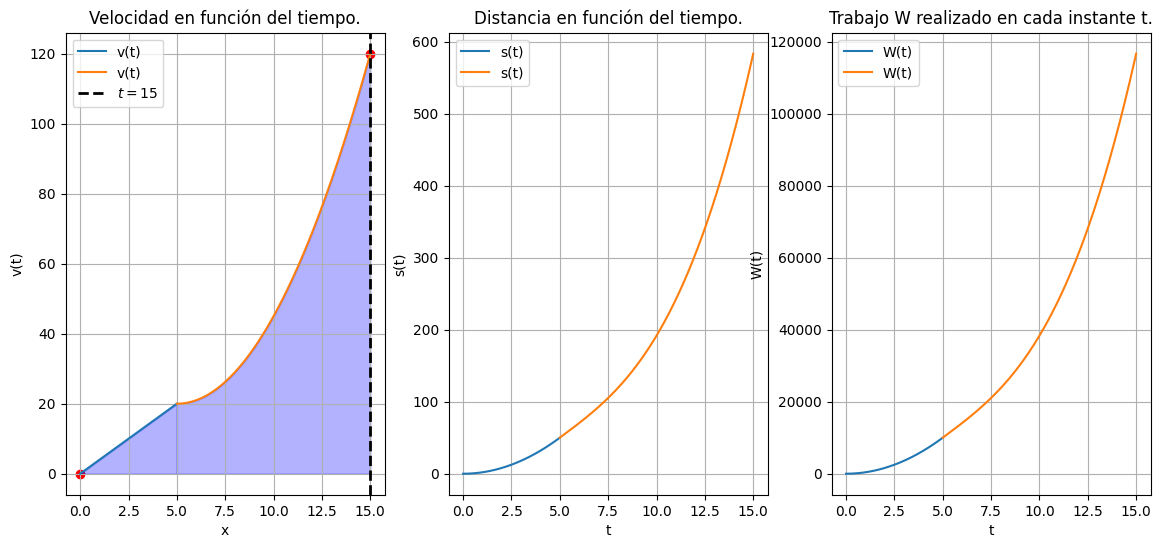

<Figure size 640x480 with 0 Axes>

In [23]:
# @title Gráficos v(x), s(x) y W(t)

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
axes[0].set_title(label='Velocidad en función del tiempo.')
axes[0].plot(t[t <= 5], v_1(t[t <= 5]), label='v(t)')
axes[0].plot(t[t > 5], v_2(t[t > 5]), label='v(t)')
axes[0].scatter([t[0], t[-1]], [v_1(t[0]), v_2(t[-1])], c='r')

# Sombrear área bajo la curva
axes[0].fill_between(t[t <= 5], v_1(t[t <= 5]), color='blue', alpha=0.3)
axes[0].fill_between(t[t > 5], v_2(t[t > 5]), color='blue', alpha=0.3)
axes[0].axvline(x=15, color='black', linestyle='--', linewidth=2, \
                    label=r'$t=15$')
axes[0].set_xlabel('x')
axes[0].set_ylabel('v(t)')
axes[0].legend()
axes[0].grid()


axes[1].set_title('Distancia en función del tiempo.')
axes[1].plot(t[t <= 5], s_t[t <= 5], label='s(t)')
axes[1].plot(t[t > 5], s_t[t > 5], label='s(t)')
axes[1].set_xlabel('t')
axes[1].set_ylabel('s(t)')
axes[1].legend()
axes[1].grid()

axes[2].set_title('Trabajo W realizado en cada instante t.')
axes[2].plot(t[t <= 5], w_t[t <= 5], label='W(t)')
axes[2].plot(t[t > 5], w_t[t > 5], label='W(t)')
axes[2].set_xlabel('t')
axes[2].set_ylabel('W(t)')
axes[2].legend()
axes[2].grid()
plt.show()
plt.tight_layout()

#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


## Solución 3)

In [24]:
# @title Funciones
t = sp.symbols('t')

# Caudal
Q = 9 + 5 * sp.cos(0.4 * t)**2
Q_ = sp.lambdify(t, Q, 'numpy')
# Concentración de flujo
c = 5 * sp.exp(-0.5 * t) + 2 * sp.exp(0.15 * t)
c_ = sp.lambdify(t, c, 'numpy')

# Función a integrar
f = Q * c
f = sp.lambdify(t, f, 'numpy')

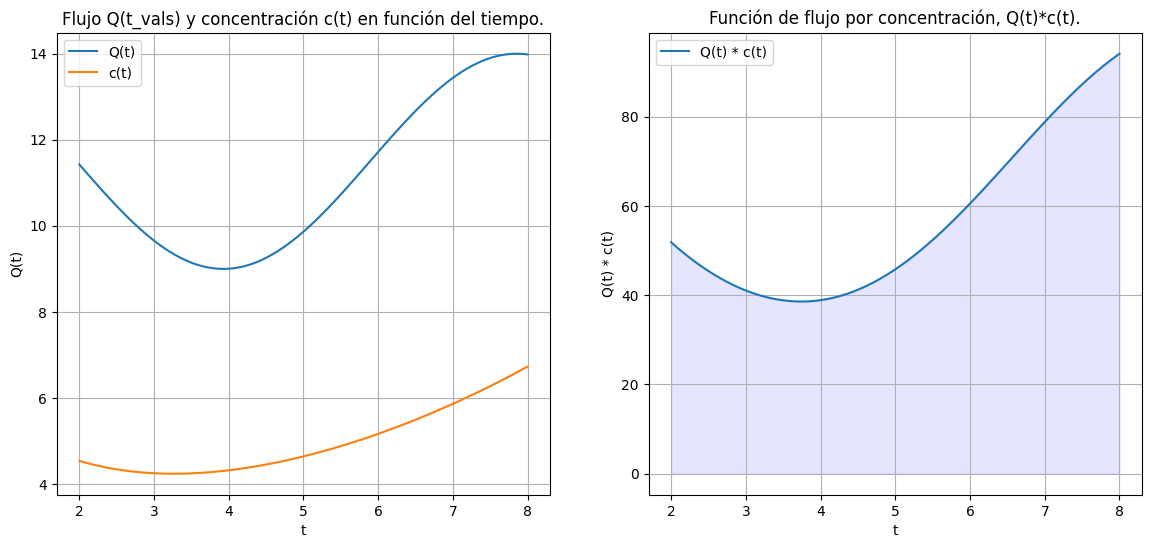

<Figure size 640x480 with 0 Axes>

In [25]:
# @title Gráfico de flujo y concentración
t_vals = np.linspace(2, 8, 100)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].set_title('Flujo Q(t_vals) y concentración c(t) en función del tiempo.')
axes[0].plot(t_vals, Q_(t_vals), label='Q(t)')
axes[0].plot(t_vals, c_(t_vals), label='c(t)')
axes[0].set_xlabel('t')
axes[0].set_ylabel('Q(t)')
axes[0].legend()
axes[0].grid()

axes[1].set_title('Función de flujo por concentración, Q(t)*c(t).')
axes[1].plot(t_vals, Q_(t_vals) * c_(t_vals), label='Q(t) * c(t)')
axes[1].set_xlabel('t')
axes[1].set_ylabel('Q(t) * c(t)')
axes[1].fill_between(t_vals, Q_(t_vals) * c_(t_vals), color='blue', alpha=0.1)
axes[1].legend()
axes[1].grid()
plt.show()
plt.tight_layout()

In [26]:
# @title Integral de Q(t)c(t) por método de Roomber
integral = romberg(f, 2, 8)

print(f'El valor de la integral es: {integral:.5f}')

El valor de la integral es: 335.96253


<ipython-input-26-4fc473a5eb7d>:2: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  integral = romberg(f, 2, 8)


In [27]:
# @title Integral de Q(t)c(t) por método de cuadratura Gaussiana
integral, error = quad(f, 2, 8)

print(f'El valor de la integral es: {integral:.5f}')

El valor de la integral es: 335.96253


Ambos métodos arrojan el mismo valor para cinco puntos decimales.

#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta_0),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta_0)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

## Solución 4)







In [28]:
# @title Parámetros iniciales
m = 2  # m = 2 kg
L = 1  # L = 1 m
b = 0.5  # b = 0.5 m
I_0 = 0.833  # I_0 = 0.833 kg * m^2
P_0 = 1.83  # P_0 = 1.83 s
A_0 = np.pi / 6  # θ_0 = 30°
k = np.sin(A_0 / 2)

In [29]:
# @title Definición de función y cálculo de la integral
a, b, = 0, np.pi / 2
f = lambda a: 1 / np.sqrt(1 - k**2 * np.sin(a)**2)
phi = np.linspace(a, b, 1000)

In [30]:
# @title Método trapezoidal
integral = trapezoid(f(phi), phi)
periodo = 2 * P_0 / np.pi * integral
print(f'El período de oscilación del péndulo es de {periodo:.5f} s.')

El período de oscilación del péndulo es de 1.86186 s.


In [31]:
# @title Método Simpson
integral = simpson(f(phi), x=phi)
periodo = 2 * P_0 / np.pi * integral
print(f'El período de oscilación del péndulo es de {periodo:.5f} s.')

El período de oscilación del péndulo es de 1.86186 s.


In [32]:
# @title Cuadratura de Gauss
integral, _ = quad(f, a, b)
periodo = 2 * P_0 / np.pi * integral
print(f'El período de oscilación del péndulo es de {periodo:.5f} s.')

El período de oscilación del péndulo es de 1.86186 s.


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


## Solución 5)
Si $A(t)$ es el número de autos que cruzan el puente en el instante $t$, entonces:

$$
A(t) = \int_{t_0}^{t} f(t)dt
$$

Para nuestro caso concreto, $t_0=0$, y $t=2$.

$$
A = 60 \int_{0}^{2} f(t)dt
$$

Luego, podemos estimar el valor de la integral (autos por hora) por cualquiera de los métodos vistos en clase.

In [33]:
# @title Función error para la aproximación por el método de Simpson
def error_simpson(f:Callable[[float], float], a_float, b:float,
                  n: int, e:float = 1.25) -> float:

  """
  La función estima el error de aproximar la integral de f por el método de
  Simpson 3/8.

  Args:
    :f: Función que se está integrando por aproximación
    :a: Límite inferior de la integral
    :b: Límite superior de la integral
    :n: Número de subintervalos
    :e: Cualquier valor entre [a, b]

  Returns:
    Error de aproximación de la integral.
  """

  import sympy as sp
  t = sp.symbols('t')
  f_diff_4 = sp.diff(f, t, 4)
  f_diff_4 = sp.lambdify(t, f_diff_4, 'numpy')

  error = -((b - a)**5 / (180 * n**4)) * f_diff_4(e)

  return error



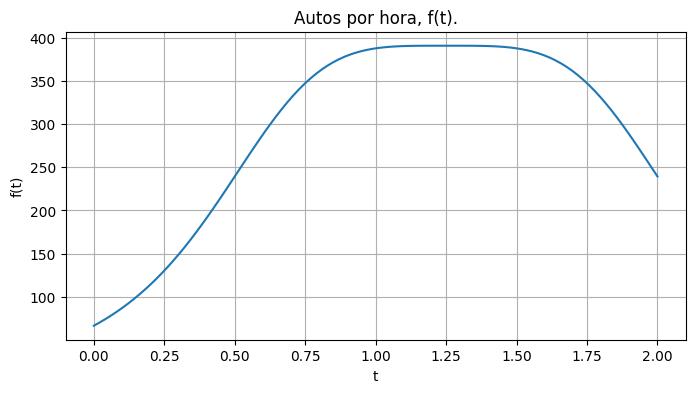

<Figure size 640x480 with 0 Axes>

In [34]:
# @title Gráficación de la función f(t)
f = (60 * 22.8) / (3.5 + 7 * (t - 1.25)**4)
f_ = sp.lambdify(t, f, 'numpy')
t_values = np.linspace(0, 2, 100)

plt.figure(figsize=(8, 4))
plt.title('Autos por hora, f(t).')
plt.plot(t_values, f_(t_values))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.show()
plt.tight_layout()

In [35]:
# @title Estimación de la función f(t)
error = 0.05  # Error máximo de aproximación

n = 1
m = 2 * n
while error_simpson(f, 0, 2, n) > error:
  n += 1

print(n)
print(f'La aproximación de la integral es: \
    {integral_simpson13(f_, 0, 2, 16):.0f}')

17
La aproximación de la integral es:     600


Así, el número de autos que pasan en la franja horaria 4-6 pm es de 600 autos.

## Error en la Regla de Simpson 1/3

La regla de Simpson 1/3 utiliza parábolas para aproximar la función y requiere un número **par** de subintervalos (\( n \) debe ser par). Su error absoluto es:

$$
E_{S1/3} \approx \frac{(b-a)}{180} h^4 \max_{x \in [a,b]} \left| f^{(4)}(x) \right|
$$

donde:

- $h = \frac{b-a}{n}$ es el tamaño del subintervalo.
- $f^{(4)}(x)$ es la cuarta derivada de la función.
- $n$ es el número de subintervalos (debe ser par).

Reescribiendo en función de $n$:

$$
E_{S1/3} \approx \frac{(b-a)^5}{180 n^4} \max_{x \in [a,b]} \left| f^{(4)}(x) \right|
$$

### 🔹 Conclusión:
El error decrece como $O(n^{-4})$, lo que significa que **duplicar $n$ reduce el error en un factor de 16**.  
Si queremos un error menor que $\varepsilon$, podemos despejar $n$:

$$
n \geq \left( \frac{(b-a)^5}{180 \varepsilon} \max |f^{(4)}(x)| \right)^{1/4}
$$

Luego, **redondeamos $n$ al siguiente número par** para cumplir con la regla de Simpson 1/3.  



#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ_0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [36]:
# @title Definición de funciones
def kk(a: float, r: float, tetha: np.ndarray) -> np.ndarray:

  """
  La función calcula todos los valores de k^2 para θ en [0, π]

  Args:
    :constantes: Valores de las constantes dadas
    :tetha: Vector de valores de θ

  Returns:
    Vector de valores de k^2
  """

  return (4*a*r*np.sin(tetha)) / (a**2 + r**2 + 2*a*r*np.sin(tetha))


def integrando_K(k_val: float) -> Callable[[float], float]:

  """
  La función retorna una función tipo lambda para cada valor de k^2, lo que
  permite evaluar la integral K(k) por algún método, como scipy.quad.

  Args:
    :k_val: Valor de k^2

  Returns:
    Función lambda en términos de phi.
  """

  return lambda phi: 1 / ((1 - k_val * np.sin(phi)**2)**0.5)


def integrando_E(k_val: float) -> Callable[[float], float]:

  """
  La función retorna una función tipo lambda para cada valor de k^2, lo que
  permite evaluar la integral K(k) por algún método, como scipy.quad.

  Args:
    :k_val: Valor de k^2

  Returns:
    Función lambda en función de phi.
  """

  return lambda phi: (1 - k_val* np.sin(phi)**2)**0.5


def K(k_val: float) -> float:

  """
  La integral arroja el valor aproximadio de la integral K(k) por el método
  scipy.quad, lo que permite obtener una buena precisión.

  Args:
    :k_val: Valor de k^2

  Returns:
    Valor de la integral K(k)
  """

  return quad(integrando_K(k_val), 0, np.pi / 2)[0]


def E(k_val: float) -> float:

  """
  La integral arroja el valor aproximadio de la integral E(k) por el método
  scipy.quad, lo que permite obtener una buena precisión.

  Args:
    :k_val: Valor de k^2

  Returns:
    Valor de la integral E(k)
  """

  return quad(integrando_E(k_val), 0, np.pi / 2)[0]


def A_phi(a: float, I: float, mu: float,
          r:float, tetha:np.ndarray) -> np.ndarray:

  """
  La función calcula A_phi(a, I, mu, r, k_val, θ) para los valores de las
  constantes y los valores de θ dados.

  Args:
    :constantes: Valores de las constantes dadas
    :tetha: Vector de valores de θ

  Returns:
    Vector de valores de A_phi(a, I, mu, r, k_val, θ)
  """
  k_val = kk(1, 1.1, tetha)
  ## Valor para cada una de las integrales de K(k) y E(k).
  valores_K = np.zeros_like(tth)
  valores_E = np.zeros_like(tth)

  for i, k_val  in enumerate(kk(1, 1.1, tth)):
    valores_K[i] = K(k_val)
    valores_E[i] = E(k_val)


  return (mu / (4*np.pi)) * (4*I*a) / \
   ((a**2 + r**2 + 2*a*r*np.sin(tetha))**0.5) * \
    (((2-k_val)*valores_K-2*valores_E) / k_val)



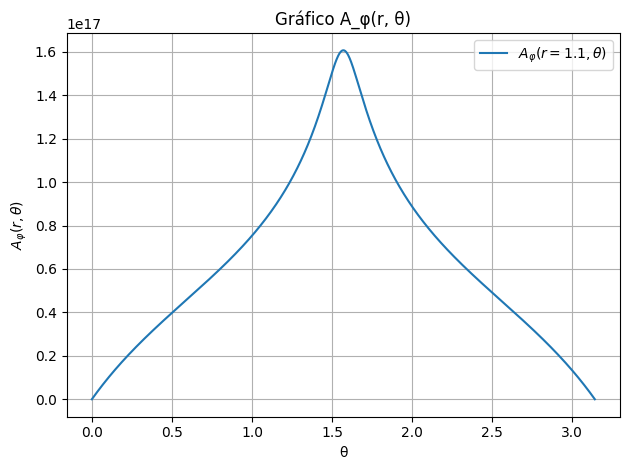

In [37]:
# @title Gráfica de A_φ(1.1, θ) vs θ
tth = np.linspace(0. , np.pi, 1000)

plt.title('Gráfico A_φ(r, θ)')
plt.plot(tth, A_phi(1, 3, 4*np.pi, 1.1, tth), label=r'$A_φ(r=1.1, θ)$')
plt.xlabel('θ')
plt.ylabel(r'$A_φ(r, θ)$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

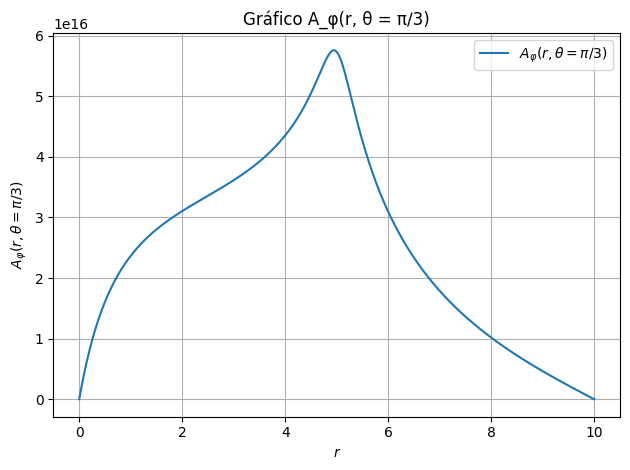

In [38]:
# @title Gráfica de A_φ(r, θ = π∕3) vs. r

r = np.linspace(0, 10, 1000)

plt.title('Gráfico A_φ(r, θ = π∕3)')
plt.plot(r, A_phi(1, 3, 4*np.pi, r, np.pi/3), label=r'$A_φ(r, θ = π∕3)$')
plt.xlabel(r'$r$')
plt.ylabel(r'$A_φ(r, θ = π∕3)$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
